# Title

## Setup and Helper Functions

In [28]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from fau_colors import cmaps, register_fausans_font

from pepbench.datasets import EmpkinsDataset, GuardianDataset
from pepbench.evaluation import PepEvaluationChallenge

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [30]:
deploy_type = "debug"

config_dict = json.load(Path("./config.json").open(encoding="utf-8"))

guardian_base_path = Path(config_dict[deploy_type]["guardian_path"])
guardian_base_path

KeyError: 'debug'

## Guardian Dataset

In [ ]:
dataset_guardian = GuardianDataset(guardian_base_path, use_cache=True, only_labeled=True)
dataset_guardian

In [31]:
subset = dataset_guardian.get_subset(participant="GDN0005", phase="Pause")

labeling_borders = subset.labeling_borders
reference_labels_icg = subset.reference_labels_icg
reference_labels_ecg = subset.reference_labels_ecg
ecg_data = subset.ecg
icg_data = subset.icg

display(labeling_borders)
display(reference_labels_ecg)
display(ecg_data)

,description,sample_absolute,sample_relative
timestamp,,,
2018-02-16 09:58:32.160000+01:00,{'Pause': 'start'},127245,127245
2018-02-16 09:59:32.160000+01:00,{'Pause': 'end'},157245,157245


sample_absolute  sample_relative
heartbeat_id channel   label                                         
0            heartbeat start                  127597              352
             ECG       Q-wave_onset           127737              492
             heartbeat end                    128053              808
1            heartbeat start                  128053              808
             ECG       Q-wave_onset           128193              948
...                                              ...              ...
62           ECG       Q-wave_onset           156070            28825
             heartbeat end                    156417            29172
63           heartbeat start                  156417            29172
             ECG       Q-wave_onset           156574            29329
             heartbeat end                    156901            29656

[192 rows x 2 columns]

,ecg
date (Europe/Berlin),
2018-02-16 09:58:32.160000+01:00,-0.080829
2018-02-16 09:58:32.162000+01:00,-0.088983
2018-02-16 09:58:32.164000+01:00,-0.105747
2018-02-16 09:58:32.166000+01:00,-0.131274
2018-02-16 09:58:32.168000+01:00,-0.171956
...,...
2018-02-16 09:59:32.152000+01:00,-0.082495
2018-02-16 09:59:32.154000+01:00,-0.098023
2018-02-16 09:59:32.156000+01:00,-0.124823


## EmpkinS Dataset

In [32]:
empkins_base_path = Path(config_dict[deploy_type]["empkins_path"])
empkins_base_path

KeyError: 'debug'

In [ ]:
dataset_empkins = EmpkinsDataset(empkins_base_path, use_cache=False, only_labeled=True)
dataset_empkins

In [ ]:
subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Math")

labeling_borders = subset.labeling_borders
reference_labels_icg = subset.reference_labels_icg
reference_labels_ecg = subset.reference_labels_ecg
ecg_data = subset.ecg
icg_data = subset.icg

display(labeling_borders)
display(reference_labels_ecg)
display(ecg_data)

## Plot Tests

In [33]:
reference_labels_ecg

sample_absolute  sample_relative
heartbeat_id channel   label                                         
0            heartbeat start                  127597              352
             ECG       Q-wave_onset           127737              492
             heartbeat end                    128053              808
1            heartbeat start                  128053              808
             ECG       Q-wave_onset           128193              948
...                                              ...              ...
62           ECG       Q-wave_onset           156070            28825
             heartbeat end                    156417            29172
63           heartbeat start                  156417            29172
             ECG       Q-wave_onset           156574            29329
             heartbeat end                    156901            29656

[192 rows x 2 columns]

In [34]:
# fig, ax = plt.subplots()
#
# subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Pause_1")
#
# ecg_data = subset.ecg_clean
# reference_labels_ecg = subset.reference_labels_ecg
# labeling_borders = subset.labeling_borders
#
# start_end_borders = reference_labels_ecg.xs("heartbeat", level="channel")
# qwave_labels = reference_labels_ecg.xs("Q-wave_onset", level="label")
#
# ecg_data.plot(ax=ax)
#
# ax.vlines(x=ecg_data.index[start_end_borders["sample_relative"]], ymin=0, ymax=1, colors=cmaps.tech[2], transform=ax.get_xaxis_transform())
# ax.scatter(x=ecg_data.index[qwave_labels["sample_relative"]], y=ecg_data["ecg"][ecg_data.index[qwave_labels["sample_relative"]]], color=cmaps.nat[0], zorder=3)
#
# fig.tight_layout()

## Signal Processing Tests

In [35]:
# subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Math")
# icg_data = subset.icg
# icg_clean = subset.icg_clean#

# fig, ax = plt.subplots()
# icg_data.plot(ax=ax)
# icg_clean.plot(ax=ax)
# fig.tight_layout()

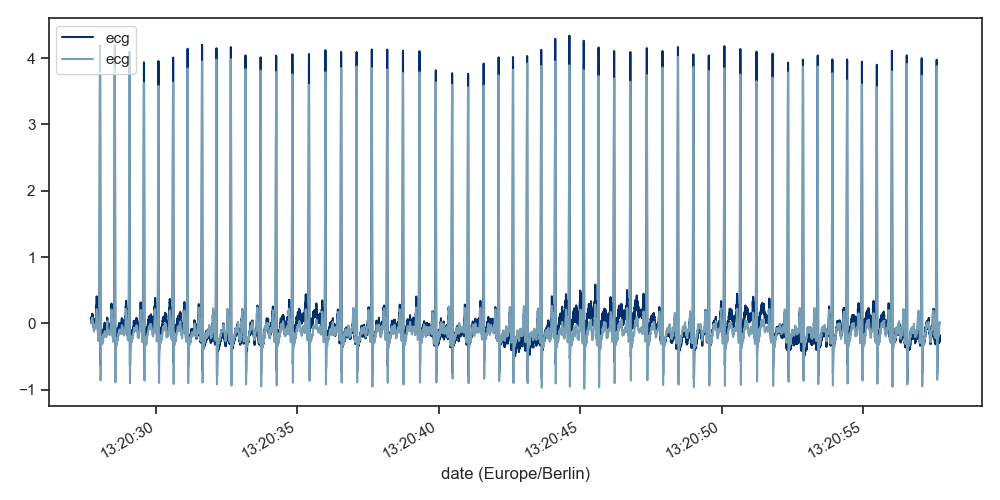

In [36]:
subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Math")
ecg_data = subset.ecg
ecg_clean = subset.ecg_clean

fig, ax = plt.subplots()
ecg_data.plot(ax=ax)
ecg_clean.plot(ax=ax)
fig.tight_layout()

In [37]:
subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Pause_1")

In [38]:
subset = dataset_guardian.get_subset(participant="GDN0005", phase="Pause")
# subset.reference_pep

## Algorithm Tests

In [39]:
from biopsykit.signals.ecg.event_extraction import (
    QWaveOnsetExtractionVanLien2013,
)
from biopsykit.signals.ecg.segmentation import HeartbeatSegmentationNeurokit
from biopsykit.signals.icg.event_extraction import (
    BPointExtractionForouzanfar2018,
    CPointExtractionScipyFindPeaks,
)
from biopsykit.signals.icg.outlier_correction import (
    OutlierCorrectionForouzanfar2018,
    OutlierCorrectionInterpolation,
)

In [40]:
# subset = dataset_empkins.get_subset(participant="VP_001", condition="tsst", phase="Pause_1")
subset = dataset_guardian.get_subset(participant="GDN0005", phase="Pause")

In [41]:
ecg_clean = subset.ecg_clean
icg_clean = subset.icg_clean
fs = subset.sampling_rate_ecg

In [42]:
heartbeats = subset.heartbeats
heartbeats

,start_time,start_sample,end_sample,r_peak_sample,rr_interval_sample,rr_interval_ms
heartbeat_id,,,,,,
0,2018-02-16 09:58:32.864000+01:00,352,808,512,456.0,912.0
1,2018-02-16 09:58:33.776000+01:00,808,1252,968,437.0,874.0
2,2018-02-16 09:58:34.664000+01:00,1252,1686,1405,432.0,864.0
3,2018-02-16 09:58:35.532000+01:00,1686,2116,1837,429.0,858.0
4,2018-02-16 09:58:36.392000+01:00,2116,2570,2266,468.0,936.0
...,...,...,...,...,...,...
59,2018-02-16 09:59:26.738000+01:00,27289,27731,27444,442.0,884.0
60,2018-02-16 09:59:27.622000+01:00,27731,28188,27886,465.0,930.0
61,2018-02-16 09:59:28.536000+01:00,28188,28672,28351,494.0,988.0


In [43]:
ecg_extraction = QWaveOnsetExtractionVanLien2013()
ecg_extraction.extract(ecg=ecg_clean, heartbeats=heartbeats, sampling_rate_hz=fs, handle_missing="ignore")
ecg_extraction.points_

,q_wave_onset_sample
heartbeat_id,
0,492.0
1,948.0
2,1385.0
3,1817.0
4,2246.0
...,...
59,27424.0
60,27866.0
61,28331.0


In [44]:
heartbeat_segmentation = HeartbeatSegmentationNeurokit()

cpoint_extraction = CPointExtractionScipyFindPeaks()
cpoint_extraction.extract(icg=icg_clean, heartbeats=heartbeats, sampling_rate_hz=fs, handle_missing="warn")

bpoint_extraction = BPointExtractionForouzanfar2018(correct_outliers=True)
bpoint_extraction.extract(
    icg=icg_clean, heartbeats=heartbeats, c_points=cpoint_extraction.points_, sampling_rate_hz=fs, handle_missing="warn"
)
bpoint_extraction.points_

outlier_correction = OutlierCorrectionInterpolation()
outlier_correction.correct_outlier(
    b_points=bpoint_extraction.points_, c_points=cpoint_extraction.points_, sampling_rate_hz=fs, handle_missing="warn"
)
outlier_correction.points_

,b_point_sample,nan_reason
heartbeat_id,,
0,483,<NA>
1,968,<NA>
2,1453,<NA>
3,1887,<NA>
4,2314,<NA>
...,...,...
59,27487,<NA>
60,27931,<NA>
61,28394,<NA>


In [45]:
from pepbench.pipelines import (
    PepExtractionPipeline,
    PepExtractionPipelineReferenceBPoints,
    PepExtractionPipelineReferenceQPoints,
)

In [46]:
heartbeat_segmentation_algo = HeartbeatSegmentationNeurokit()
q_wave_algo = QWaveOnsetExtractionVanLien2013()
b_point_algo = BPointExtractionForouzanfar2018(correct_outliers=True)
outlier_correction_algo = OutlierCorrectionForouzanfar2018()
# outlier_correction_algo = OutlierCorrectionDummy()

In [47]:
pipeline_qpoints = PepExtractionPipelineReferenceQPoints(
    heartbeat_segmentation_algo=heartbeat_segmentation_algo,
    q_wave_algo=q_wave_algo,
    b_point_algo=b_point_algo,
    outlier_correction_algo=outlier_correction_algo,
    handle_missing_events="ignore",
)

In [48]:
pipeline_bpoints = PepExtractionPipelineReferenceBPoints(
    heartbeat_segmentation_algo=heartbeat_segmentation,
    q_wave_algo=q_wave_algo,
    b_point_algo=b_point_algo,
    outlier_correction_algo=outlier_correction_algo,
    handle_missing_events="ignore",
)

In [49]:
pipeline = PepExtractionPipeline(
    heartbeat_segmentation_algo=heartbeat_segmentation_algo,
    q_wave_algo=q_wave_algo,
    b_point_algo=b_point_algo,
    outlier_correction_algo=outlier_correction_algo,
    handle_negative_pep="nan",
    handle_missing_events="ignore",
)

In [57]:
subset_guardian = dataset_guardian.get_subset(participant=["GDN0005", "GDN0006"])
pep_challenge = PepEvaluationChallenge(dataset=subset_guardian)

pep_challenge.run(pipeline)

Datapoints:   0%|          | 0/9 [00:00<?, ?it/s]

{}


PepEvaluationChallenge(dataset=GuardianDataset [9 groups/rows]

     participant          phase
   0     GDN0005          Pause
   1     GDN0005       Valsalva
   2     GDN0005  HoldingBreath
   3     GDN0005         TiltUp
   4     GDN0005       TiltDown
   5     GDN0006          Pause
   6     GDN0006       Valsalva
   7     GDN0006         TiltUp
   8     GDN0006       TiltDown, scoring=<function score_pep_evaluation at 0x15eb93640>, validate_kwargs={})

In [61]:
pep_challenge.results_as_df()

PepEvaluationChallenge(dataset=GuardianDataset [9 groups/rows]

     participant          phase
   0     GDN0005          Pause
   1     GDN0005       Valsalva
   2     GDN0005  HoldingBreath
   3     GDN0005         TiltUp
   4     GDN0005       TiltDown
   5     GDN0006          Pause
   6     GDN0006       Valsalva
   7     GDN0006         TiltUp
   8     GDN0006       TiltDown, scoring=<function score_pep_evaluation at 0x15eb93640>, validate_kwargs={})

In [66]:
pep_challenge.results_agg_

,mean,std,total
metrics,,,
pep_reference_ms,152.278017,19.234082,NaN
pep_estimated_ms,138.502508,29.292639,NaN
error_ms,-13.995742,20.346458,NaN
absolute_error_ms,21.017465,19.974798,NaN
absolute_relative_error_percent,14.097619,12.591993,NaN
error_per_sample_ms,-15.363971,35.474927,NaN
absolute_error_per_sample_ms,22.209559,31.642654,NaN
absolute_relative_error_per_sample_percent,14.761232,19.969932,NaN
num_pep_total,NaN,NaN,548.0


In [ ]:
# pipeline_qpoints.safe_run(subset);
# pipeline_bpoints.safe_run(subset);
# for subset_test in tqdm(dataset_empkins.groupby(["participant", "condition", "phase"])):
#    key = tuple(subset_test.index.iloc[0])
#    result_dict = dict.fromkeys(["pep_results", "b_point_after_outlier_correction_results", "b_point_results", "c_point_results", "heartbeat_segmentation_results"])
#    print(key)
#    if key not in pep_result_dict:
#        pipeline.safe_run(subset_test);
#        for data_key in result_dict:
#            result_dict[data_key] = getattr(pipeline, f"{data_key}_")
#        pep_result_dict[key] = result_dict

In [ ]:
# subset_test = dataset_empkins.get_subset(participant='VP_001', condition='ftsst', phase='Pause_1') # this causes an error in matching => good for testing
# subset_test = dataset_empkins.get_subset(participant='VP_001', condition='tsst', phase='Pause_1')
# pipeline.safe_run(subset_test);

In [ ]:
# pipeline.pep_results_#.filter(regex="(pep|q_wave|b_point|nan_reason)")

In [ ]:
# for key, val in pep_result_dict.items():
#    res = val["pep_results"]
#    #.filter(regex="(pep|q_wave|b_point|nan_reason)")
#    if not res.loc[res["pep_ms"].isna()].empty:
#        print(key)
#        display(res.loc[res["pep_ms"].isna()])

In [ ]:
# for subset_test in tqdm(dataset_empkins.groupby(["participant", "condition", "phase"])):
#    pep_ref = subset_test.reference_pep
#    if not pep_ref.loc[pep_ref["pep_ms"].isna()].empty:
#        print(subset_test.index)
#        display(pep_ref)

In [ ]:
res_df_agg, res_df_single, res_df_per_sample = convert_validate_result_to_dataframe(
    dataset=dataset_empkins, results=results
)
res_df_per_sample.loc[~res_df_per_sample["nan_reason"].isna()["reference"]]

In [ ]:
# subset_test = dataset_empkins.get_subset(participant="VP_002", condition="ftsst", phase="Talk")
# match_heartbeat_lists(heartbeats_reference=subset_test.reference_heartbeats, heartbeats_extracted=subset_test.heartbeats, tolerance_ms=20, sampling_rate_hz=subset_test.sampling_rate_ecg)

In [ ]:
fig, ax = plt.subplots()
heartbeats = subset_test.heartbeats
# heartbeats = subset_test.reference_heartbeats
ecg_data = subset_test.ecg
ecg_data.plot(ax=ax)

ax.vlines(
    x=ecg_data.index[heartbeats["start_sample"]],
    ymin=0,
    ymax=1,
    colors=cmaps.tech[2],
    transform=ax.get_xaxis_transform(),
    label="start",
)
ax.vlines(
    x=ecg_data.index[heartbeats["end_sample"]],
    ymin=0,
    ymax=1,
    colors=cmaps.med[2],
    transform=ax.get_xaxis_transform(),
    label="end",
)

ax.legend()
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
pipeline.heartbeat_segmentation_results_[["rr_interval_ms"]].plot(ax=ax)

fig.tight_layout()

In [ ]:
res = pipeline.pep_results_.filter(regex="(pep|q_wave|b_point|nan_reason)")
res.loc[res["pep_ms"].isna()]

In [ ]:
pipeline_qpoints.pep_results_.filter(regex="(pep|q_wave|b_point|nan_reason)")

In [ ]:
pipeline_bpoints.pep_results_.filter(regex="(pep|q_wave|b_point|nan_reason)")

In [ ]:
fig, ax = plt.subplots()

icg_data = subset.icg_clean
reference_labels_icg = subset.reference_labels_icg
labeling_borders = subset.labeling_borders

start_end_borders = reference_labels_icg.xs("heartbeat", level="channel")
bpoint_labels = reference_labels_icg.xs("B-point", level="label")
# bpoint_artefacts = reference_labels_icg.xs("Artefact", level="label")
bpoint_labels_algo = bpoint_extraction.points_["b_point_sample"].dropna()
bpoint_labels_outlier = outlier_correction.points_["b_point_sample"].dropna()

icg_data.plot(ax=ax)

ax.vlines(
    x=icg_data.index[start_end_borders["sample_relative"]],
    ymin=0,
    ymax=1,
    colors=cmaps.tech[2],
    transform=ax.get_xaxis_transform(),
)
ax.scatter(
    x=icg_data.index[bpoint_labels["sample_relative"]],
    y=icg_data["icg_der"][icg_data.index[bpoint_labels["sample_relative"]]],
    color=cmaps.nat[0],
    zorder=3,
    label="Reference",
)
# ax.scatter(x=icg_data.index[bpoint_artefacts["sample_relative"]], y=icg_data["icg_der"][icg_data.index[bpoint_artefacts["sample_relative"]]], color=cmaps.med[0], zorder=3, label="Artefacts")
ax.scatter(
    x=icg_data.index[bpoint_labels_algo.astype(int)],
    y=icg_data["icg_der"][icg_data.index[bpoint_labels_algo.astype(int)]],
    color=cmaps.phil[0],
    zorder=3,
    label="Algorithm",
)
ax.scatter(
    x=icg_data.index[bpoint_labels_outlier.astype(int)],
    y=icg_data["icg_der"][icg_data.index[bpoint_labels_outlier.astype(int)]],
    color=cmaps.wiso[0],
    zorder=3,
    label="Outlier Correction",
)

ax.legend()

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ecg_data = subset.ecg_clean
reference_labels_ecg = subset.reference_labels_ecg
labeling_borders = subset.labeling_borders

start_end_borders = reference_labels_ecg.xs("heartbeat", level="channel")
qwave_labels = reference_labels_ecg.xs("Q-wave_onset", level="label")
qwave_labels_algo = ecg_extraction.points_["q_wave_onset_sample"].dropna()

ecg_data.plot(ax=ax)

ax.vlines(
    x=ecg_data.index[start_end_borders["sample_relative"]],
    ymin=0,
    ymax=1,
    colors=cmaps.tech[2],
    transform=ax.get_xaxis_transform(),
)
ax.scatter(
    x=ecg_data.index[qwave_labels["sample_relative"]],
    y=ecg_data["ecg"][ecg_data.index[qwave_labels["sample_relative"]]],
    color=cmaps.nat[0],
    zorder=3,
)
ax.scatter(
    x=ecg_data.index[qwave_labels_algo.astype(int)],
    y=ecg_data["ecg"][ecg_data.index[qwave_labels_algo.astype(int)]],
    color=cmaps.phil[0],
    zorder=3,
)

fig.tight_layout()